## GOAL: Create a model to predict whether or not a customer will Churn .

**Fact: Customer churn is the percentage of customers who stopped purchasing your business's products or services during a certain period of time.**

**The data file is "Telco-Customer-Churn.csv"**

**Analyse By Puyush Gupta**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option("display.max_columns", None)
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Exploratory Data Analysis

**We want to analyze the dataset thoroughly so that we can make strategy to achieve the following:**

(i) Upsell to existing Customers

(ii) Acquire new Customers

(iii) Increase the customer Retention

1. To check whether there are any missing values in any feature column

In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Observation:** That's there are no NaN cells in anyone of feature column

2. To check the balance of the class labels (Churn) with a Count Plot

<Axes: xlabel='Churn', ylabel='count'>

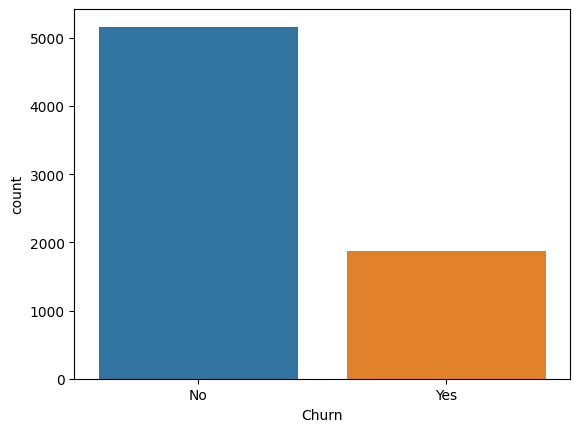

In [9]:
sns.countplot(data=df,x='Churn')

In [10]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

**Observation:** This is a Imbalanced dataset as there are only 26.57% of churned users in this dataset but it's not that extreme. We might need to use resampling techinque.

3. Distrbution of TotalCharges between Churn categories with a Violin Plot.

<Axes: xlabel='Churn', ylabel='TotalCharges'>

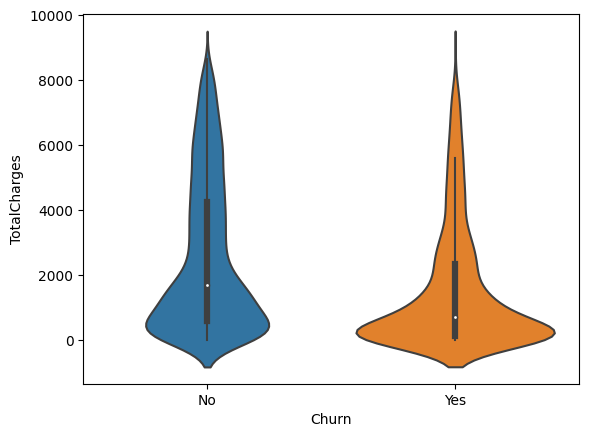

In [11]:
sns.violinplot(data=df,x='Churn',y='TotalCharges')

4. Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.

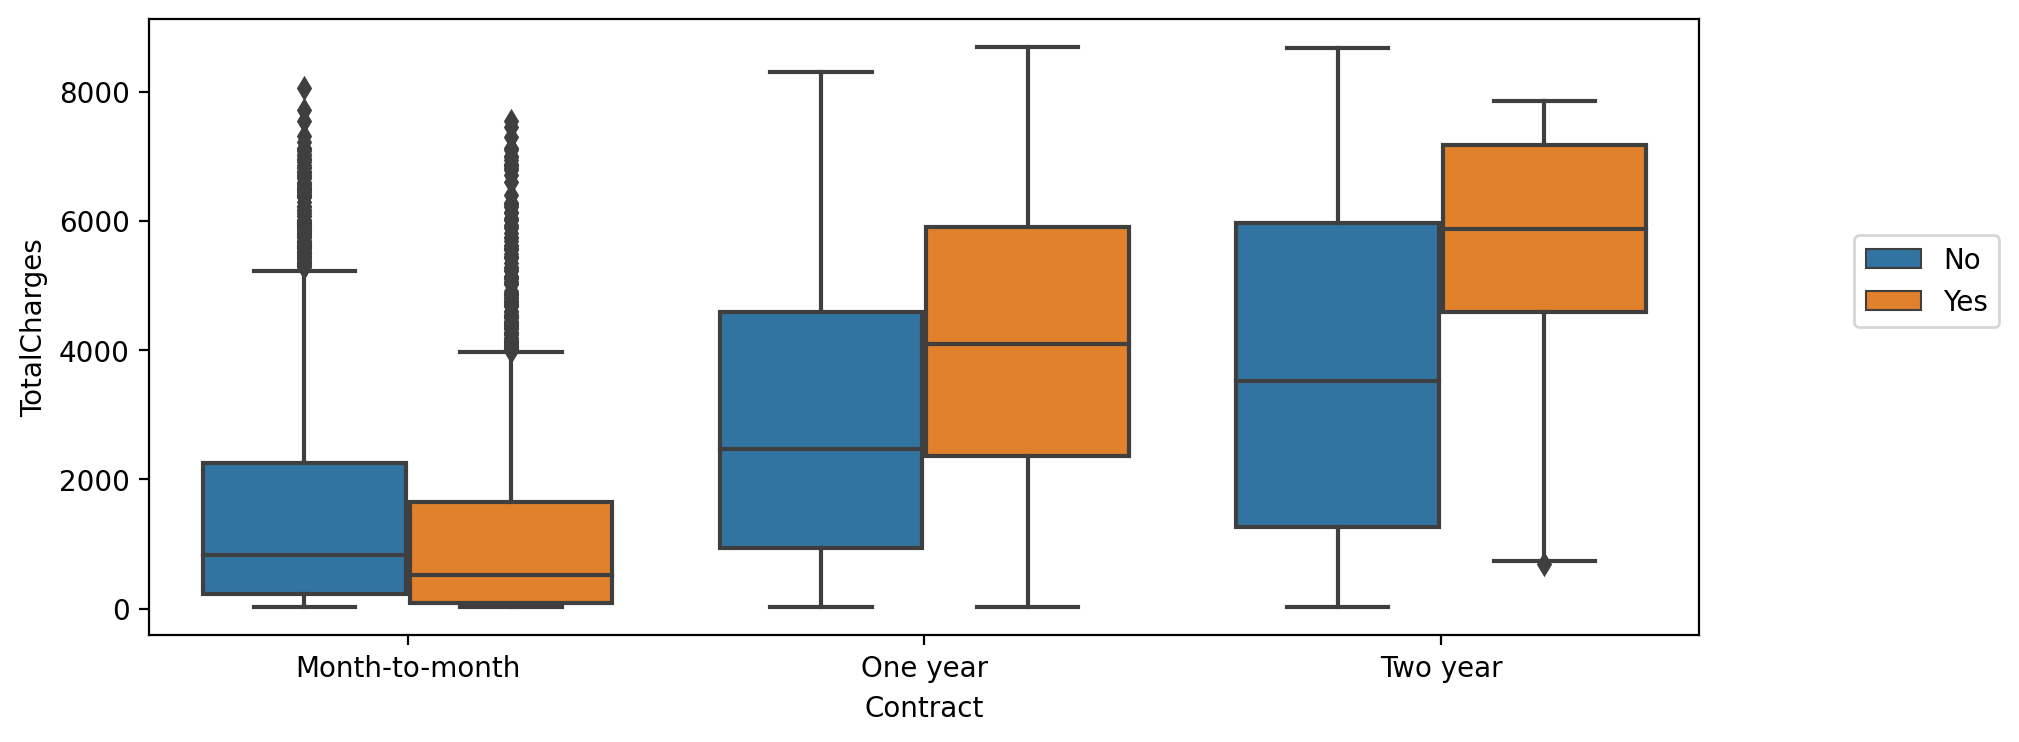

In [12]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5))

**Observation:** The longer we stay on, the more charges we are getting for people who have actually churned. For One year Contract and Two year Contract, people who did churn are having overall higher Total Charges than people who did not churn who had lower Total Charges. That's after one or two year, people are more likely to churn if they're having more Total Charges. We can give bonus reduction after a one year contract or a two year contract so that we can bring down those charges again to make sure customer doesn't churn.

5. A bar plot showing the correlation of the following categorical features to the class label.

['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
# For the categorical features, you will need to convert them into dummy variables
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

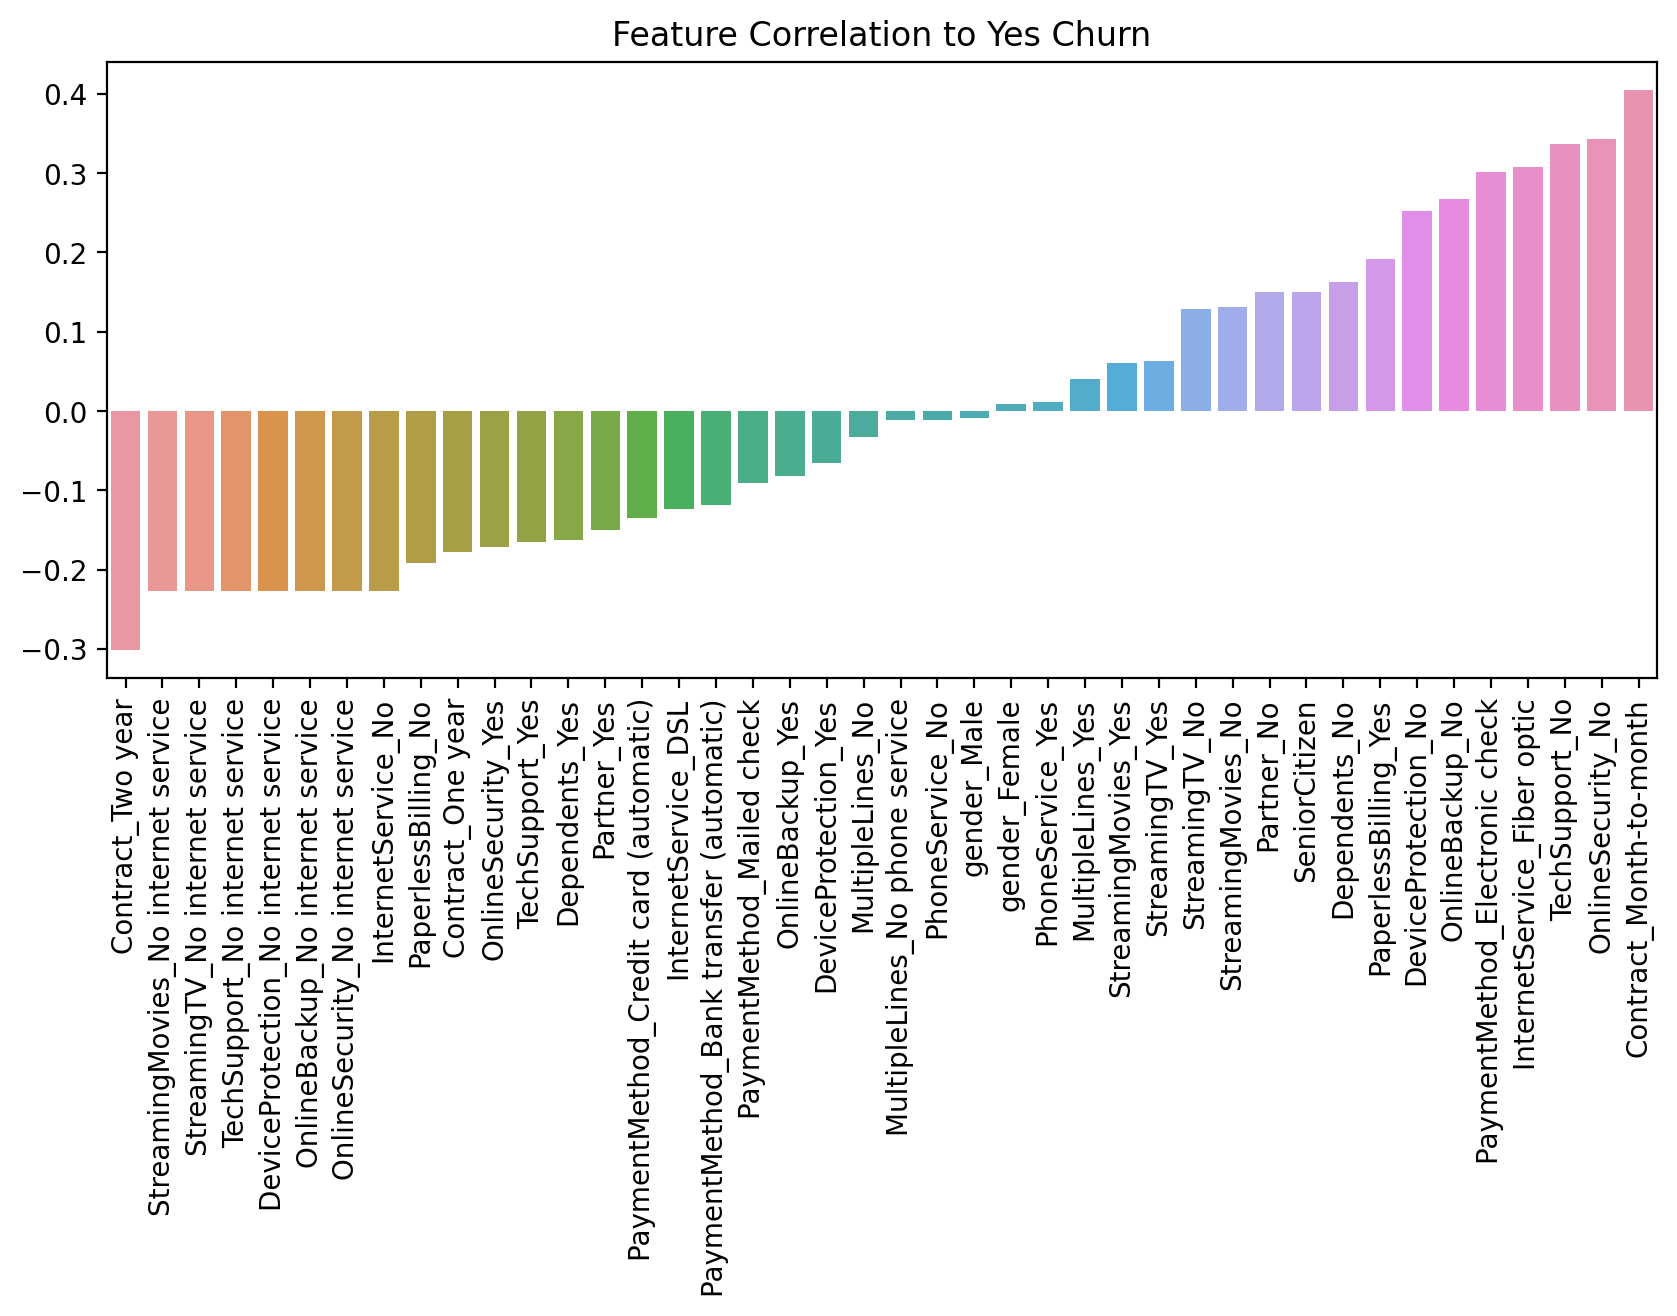

In [15]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

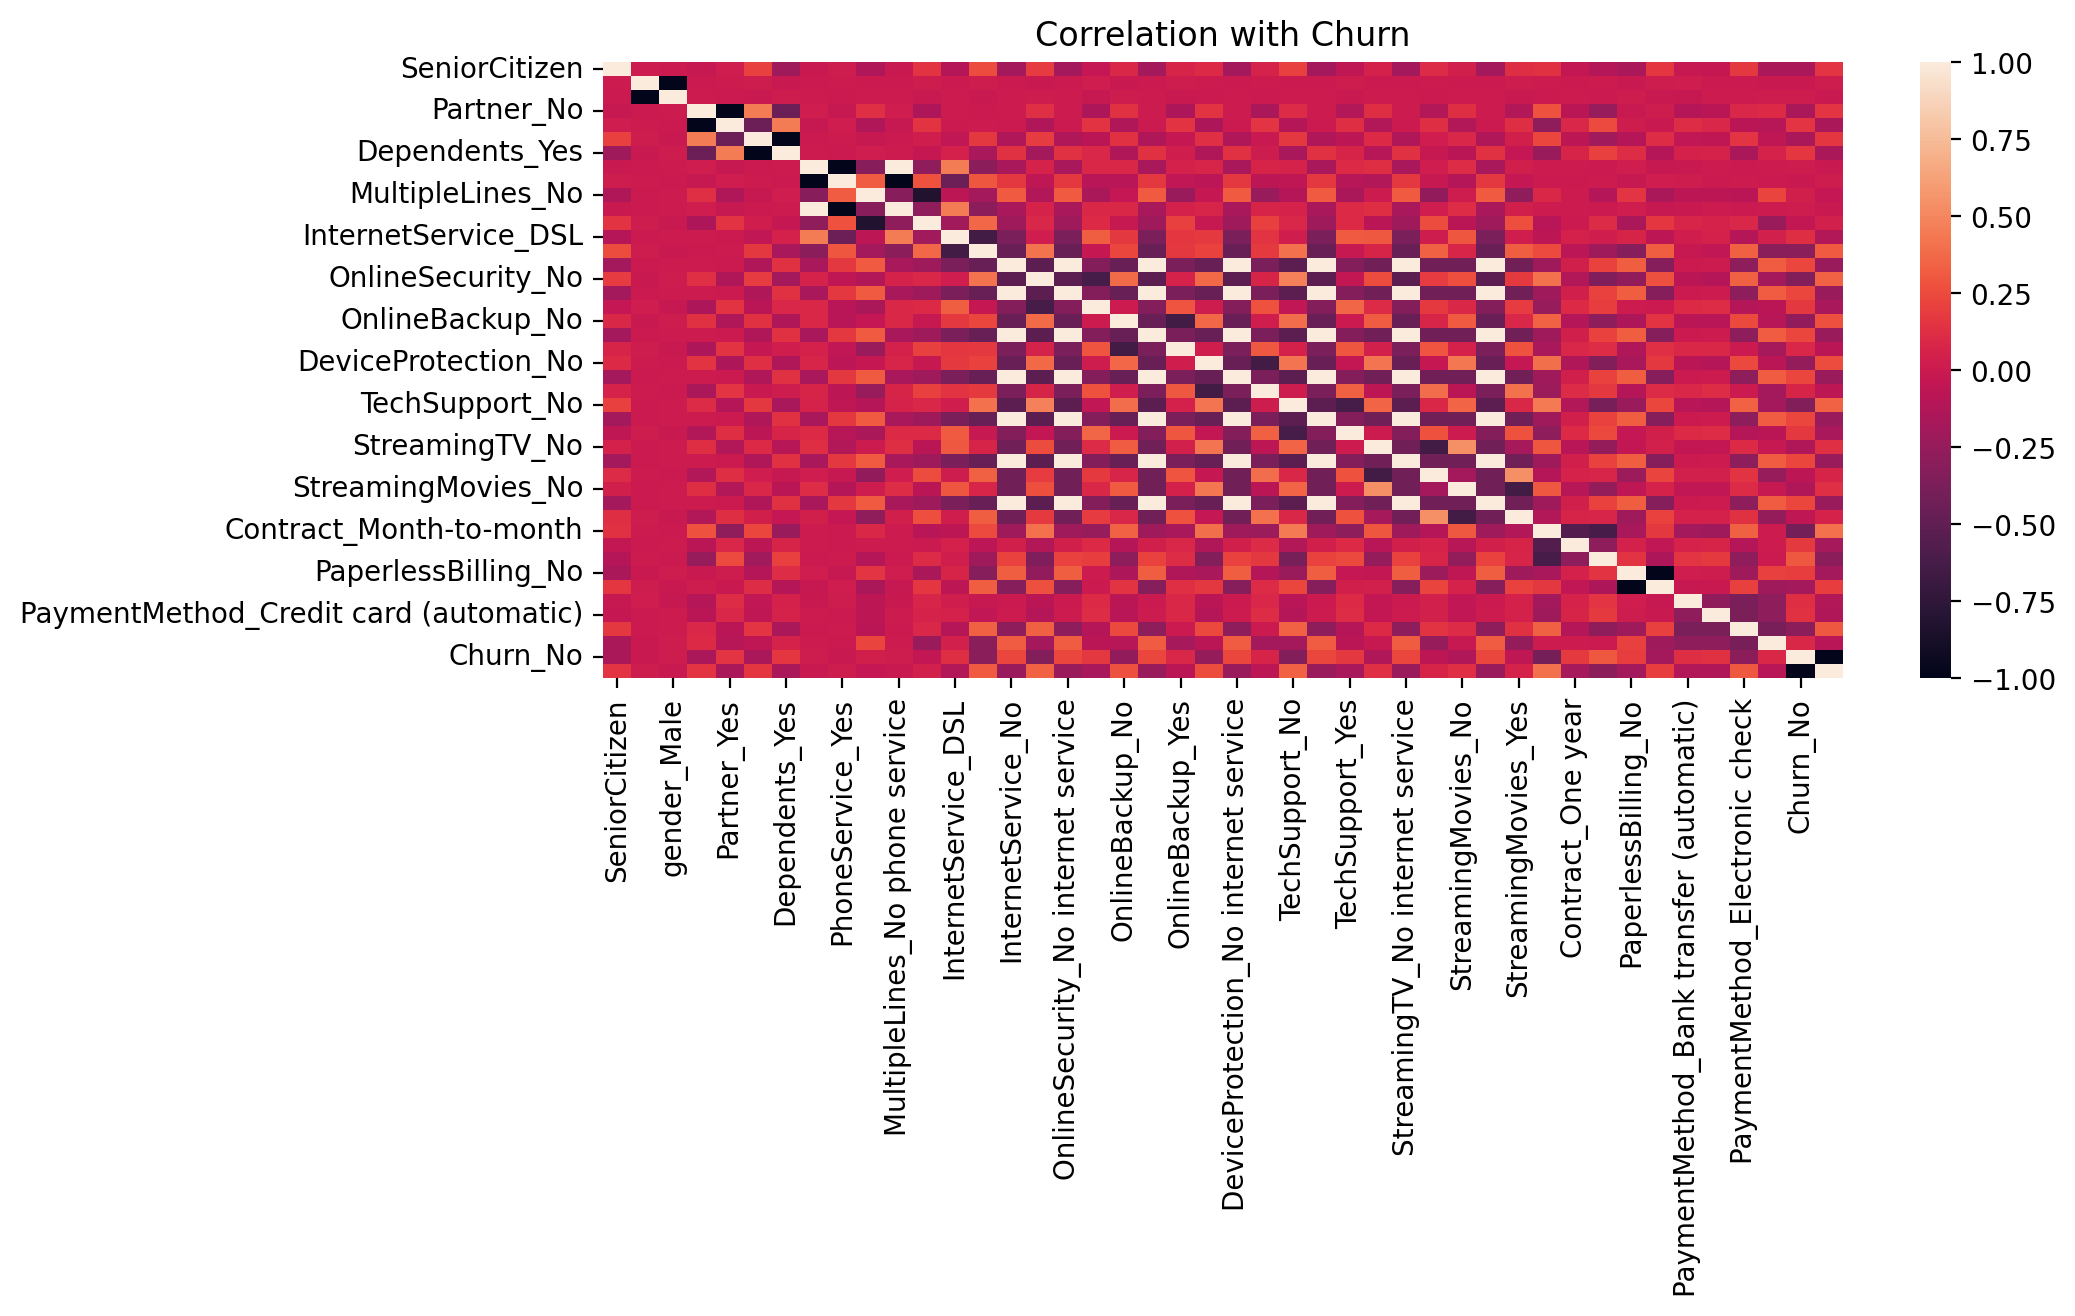

In [16]:
plt.figure(figsize=(10,4),dpi=200)
sns.heatmap(corr_df,annot = False)
plt.title('Correlation with Churn');

**Observation:** 

(i) Somebody with Month-to-Month Contract is highly correlated with Churning which makes sense as if someone is signing up for a Month-to-Month Contract, they're planning to end their service soon. Alos, Contract of 2 year is not correlated with it as if we are locked into a 2 Year Contract, it is highly unlikely you're going to break your contract within those 2 years

(ii) Customers without online security, online backup, device protecion and tech support tend to churn more often than their counterparts. High Churn seen in case of Month to month contracts and Fibre Optics Internet. 

(iii) Low Churn is seen in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

(iv) Factors like Gender, Availability of PhoneService and number of multiple lines have almost NO impact on Churn

6. Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer separated by two additional features, Churn and Contract..

<Figure size 2000x600 with 0 Axes>

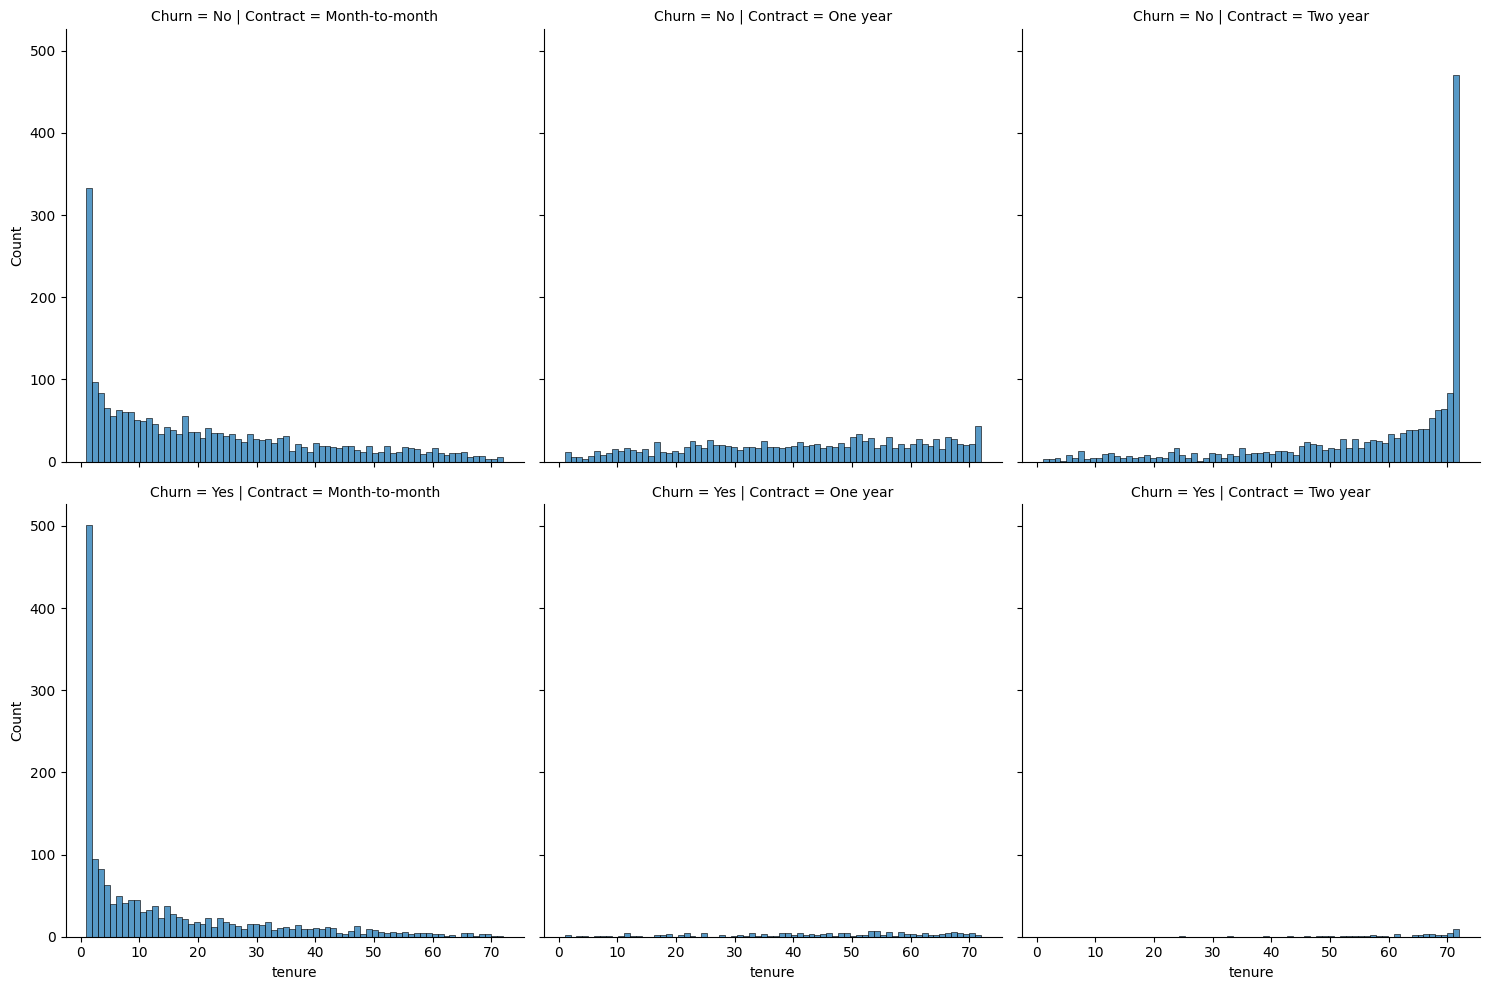

In [17]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

**Observation:**

(i) Customers who spent less than 1 year using our services tend to churn substantially more than the customers who spent more than 2 years using our services. Don't worry about One or Two year Contract because they are very unlikely to churn in comparison to month to month.

(ii) Interesting is, in Month-to-Month service, there's essentially evenly split churn. Our focus should be how do we actually get people on a Month-to-Month service to stay longer and not Churn.

(iii) There are people who need services for 20 to 30 months which is really a long tenure and interesting is they are still on Month-to-Month service instead of choosing One or Two year Contract. As observed earlier, people tend to churn based on Total Charges and Month Charges, So may be, they're going to charge more on a month-to-month even though they intend to keep it for longer tenure. 
For these people, We can do our promotions by sending notifications like "Hey! Our company noticed you're on Month-to-Month plan fo rmore than 12 months. How about signing up for a One-Year Contract with discount? This can lower your overall bill"

7. Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

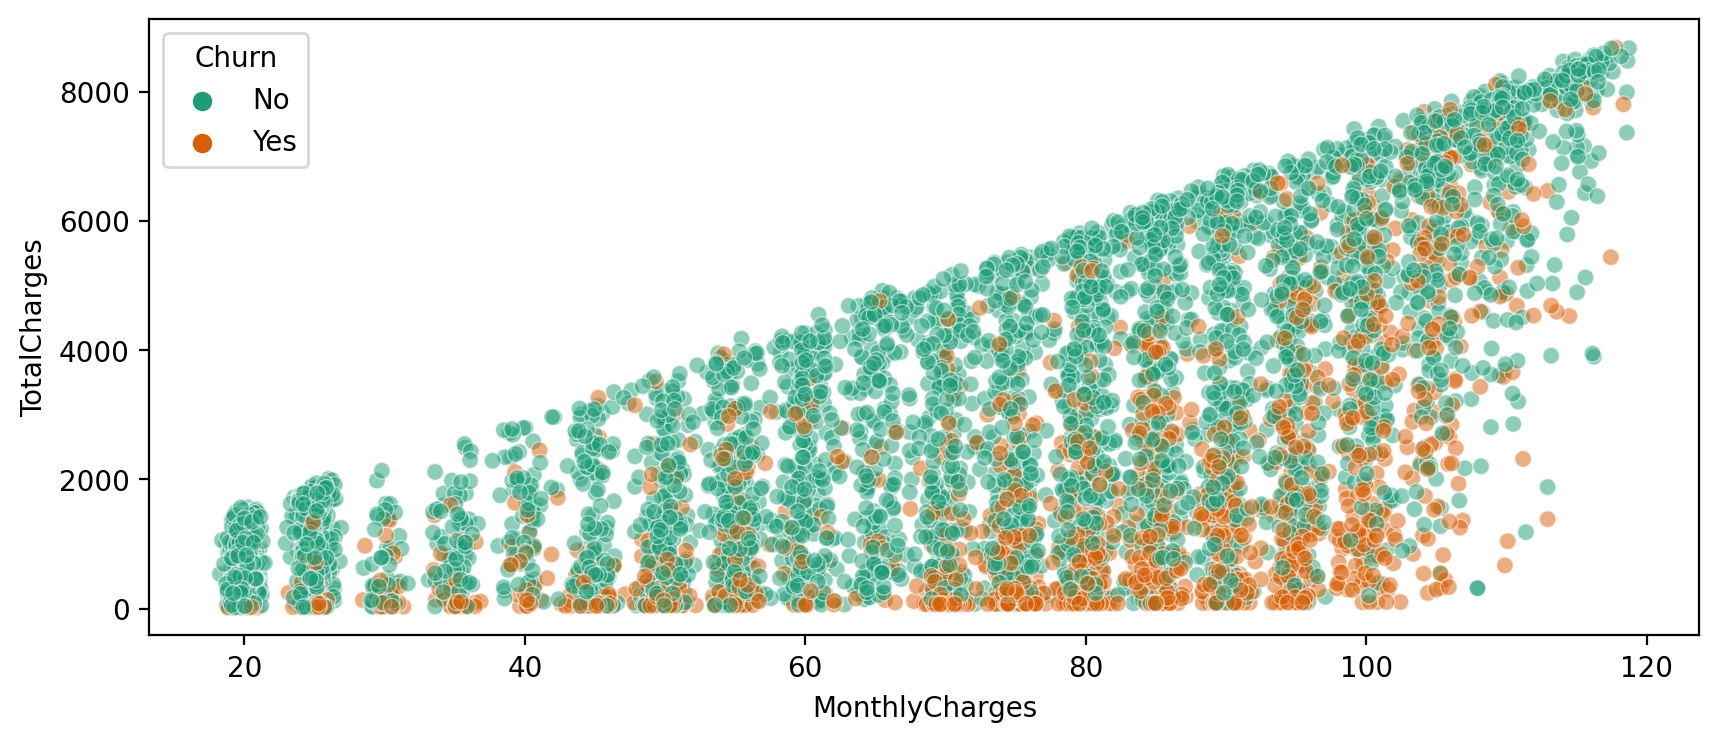

In [18]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5,palette='Dark2')

**Observation:**

(i) People tend to Churn when theie monthly charges are higher. This makes sense as if one is paying more and more per month, he is going to figure out a better service with cheaper rates.

(ii) For a company's perspective, they want to maximize Total Charges. There are people paying a lot per month but the Total Charges are very low versus same people up there who are paying exactly same in monthly charges, but we are able to extract more out of them in Totla Charges. 

8. Treating each unique tenure group(1 month, 2 month, 3 month...N months as its own cohort) as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort and create a plot showing churn rate per months of tenure.

In [19]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [20]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

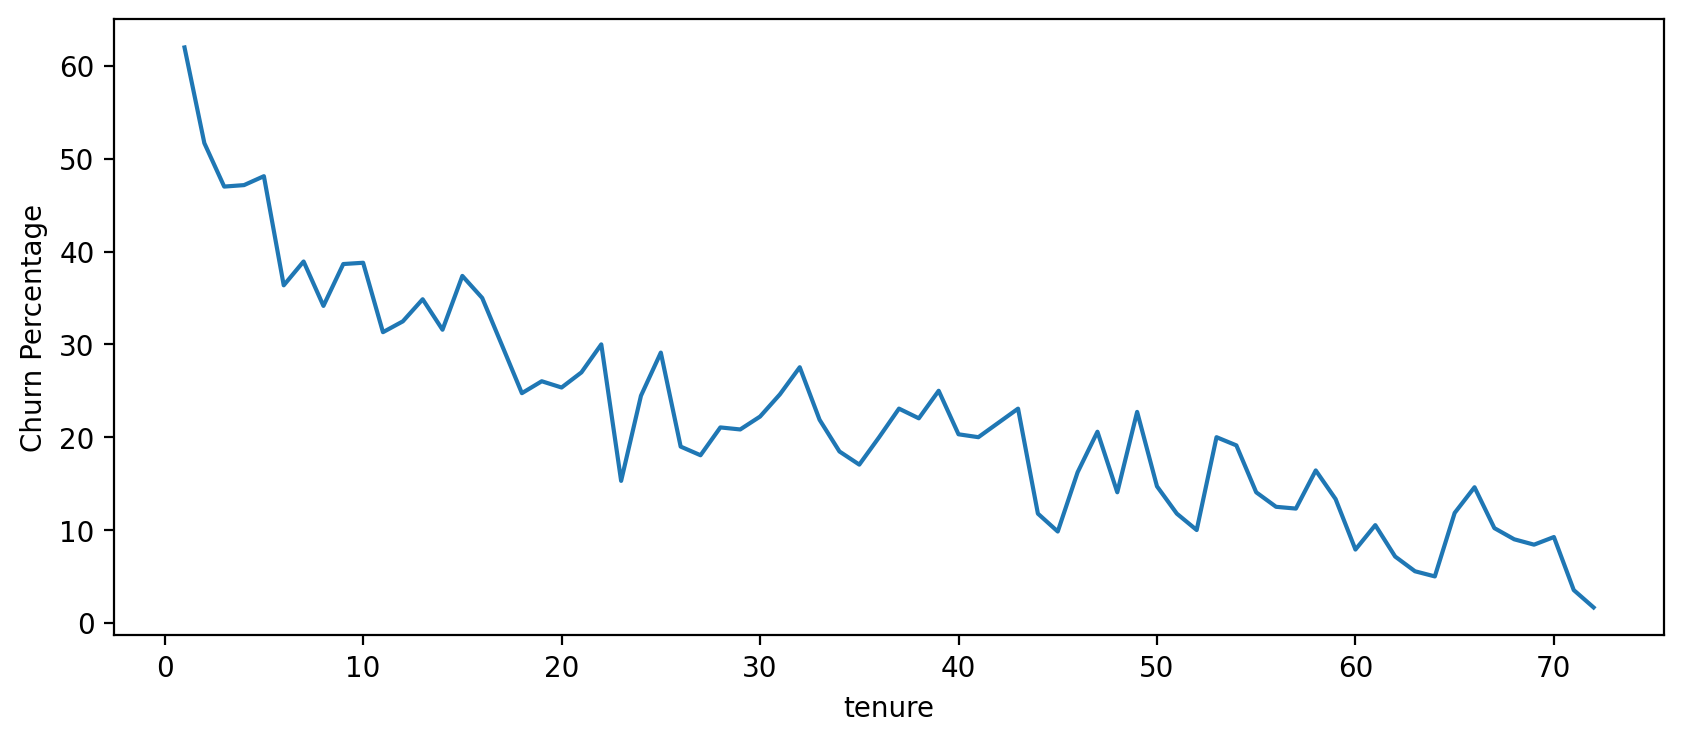

In [21]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

**Observation:** We are observing a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as we are less likely to stop service, the longer we've had it. As the tenure increases, the churn rate decreases

9. Create Broader Cohort Groups. Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories. 
   * '0-12 Months'
   * '24-48 Months'
   * '12-24 Months'
   * 'Over 48 Months'  

   (i) Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort.
   
   (ii) Create a count plot showing the churn count per cohort.

   (iii) Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.

In [22]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [23]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [24]:
df.head(10)[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

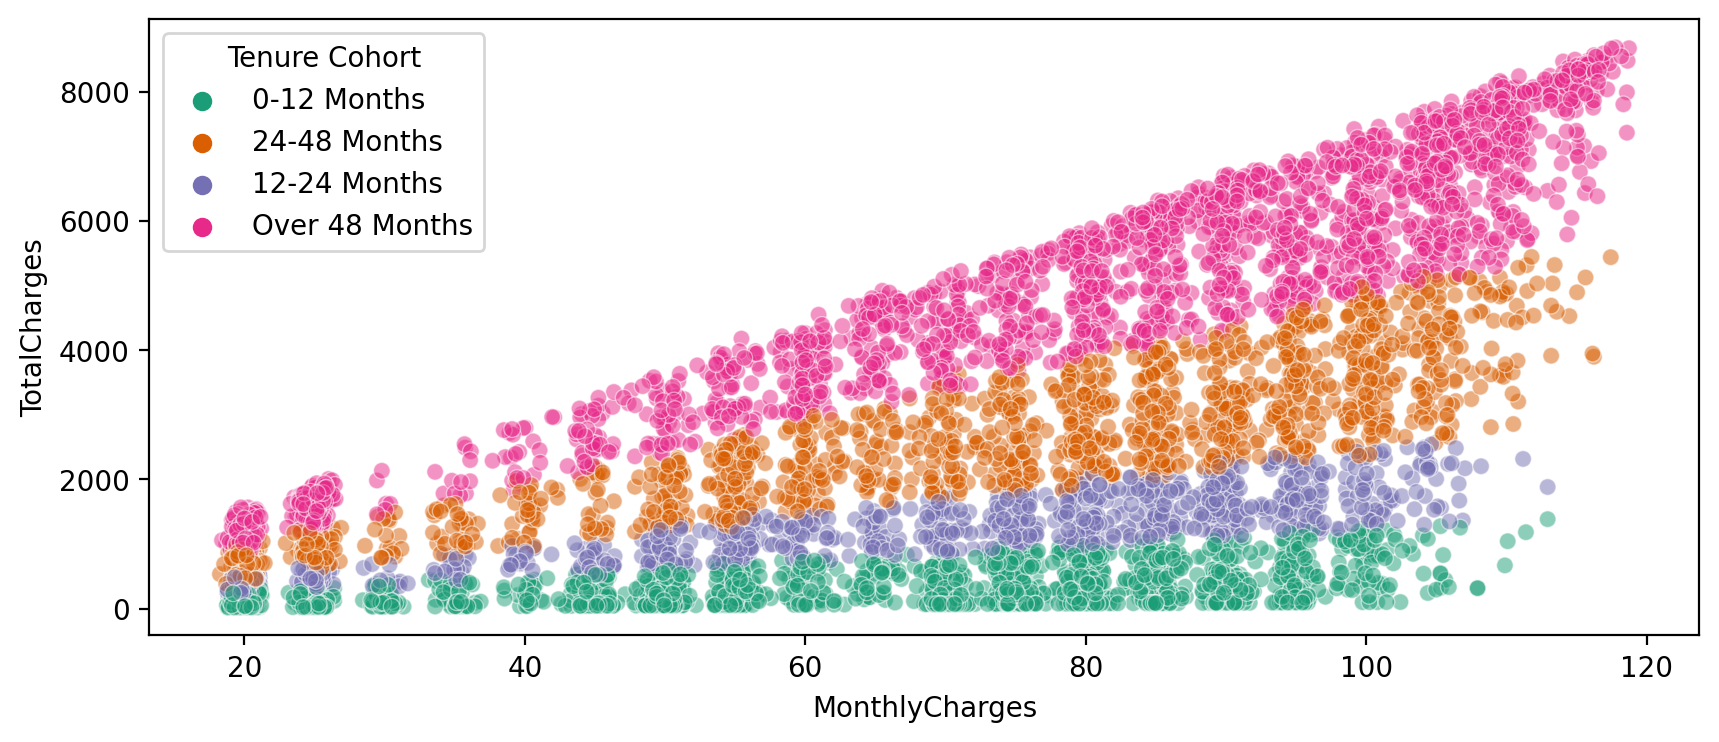

In [25]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort', linewidth=0.5,alpha=0.5,palette='Dark2')

**Observation:** People that are only staying for less than 12 months or so, We're not getting as much Total Charges from them versus people that are staying for over 48 months now.

<Axes: xlabel='Tenure Cohort', ylabel='count'>

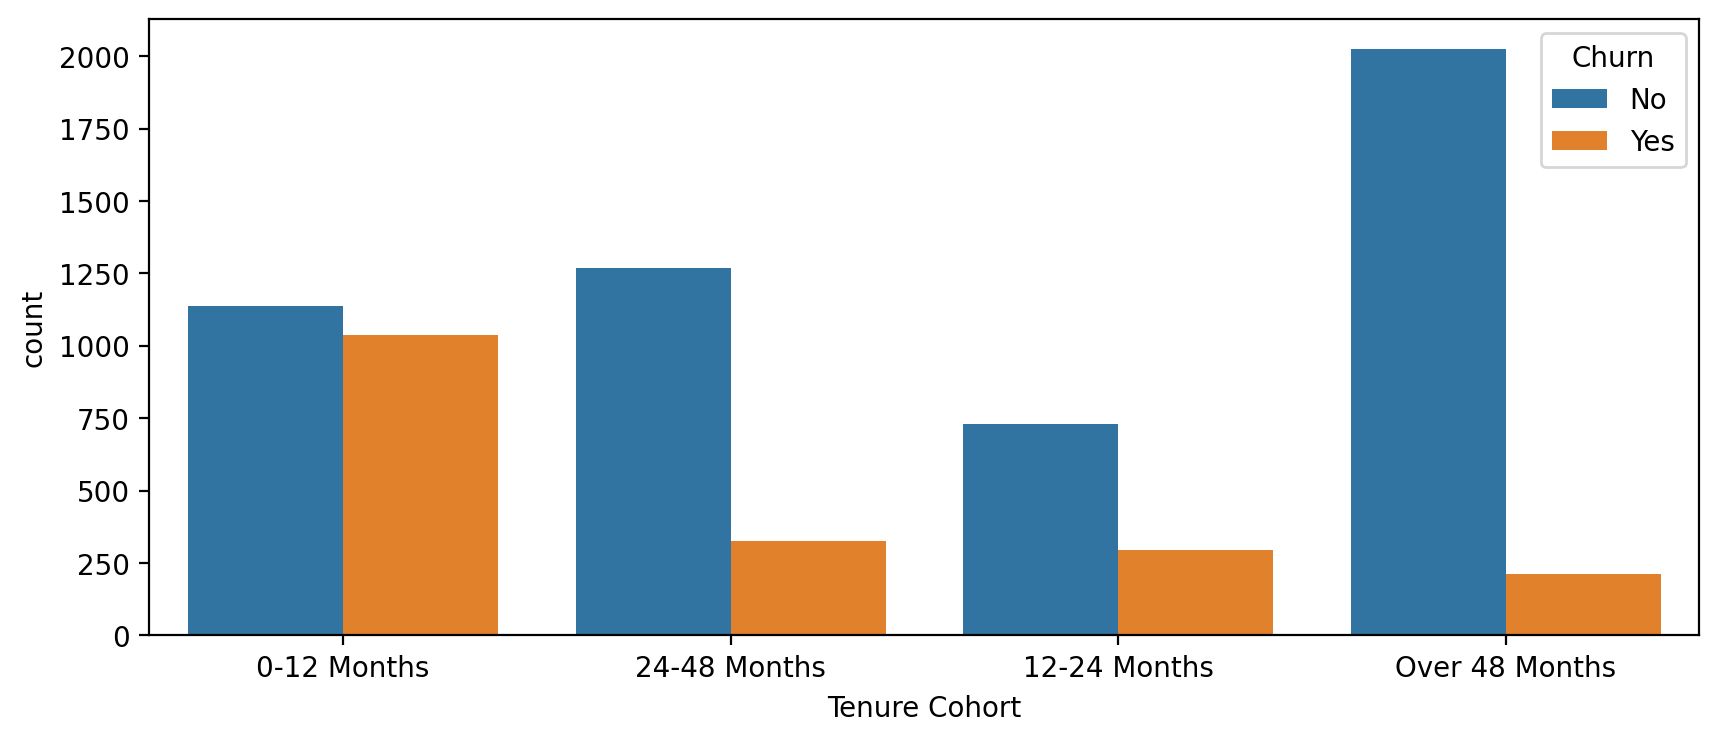

In [26]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

**Observation:**
People that are staying for over 48 months are not likely to churn versus if one is using service for less than 12 months

<Figure size 2000x800 with 0 Axes>

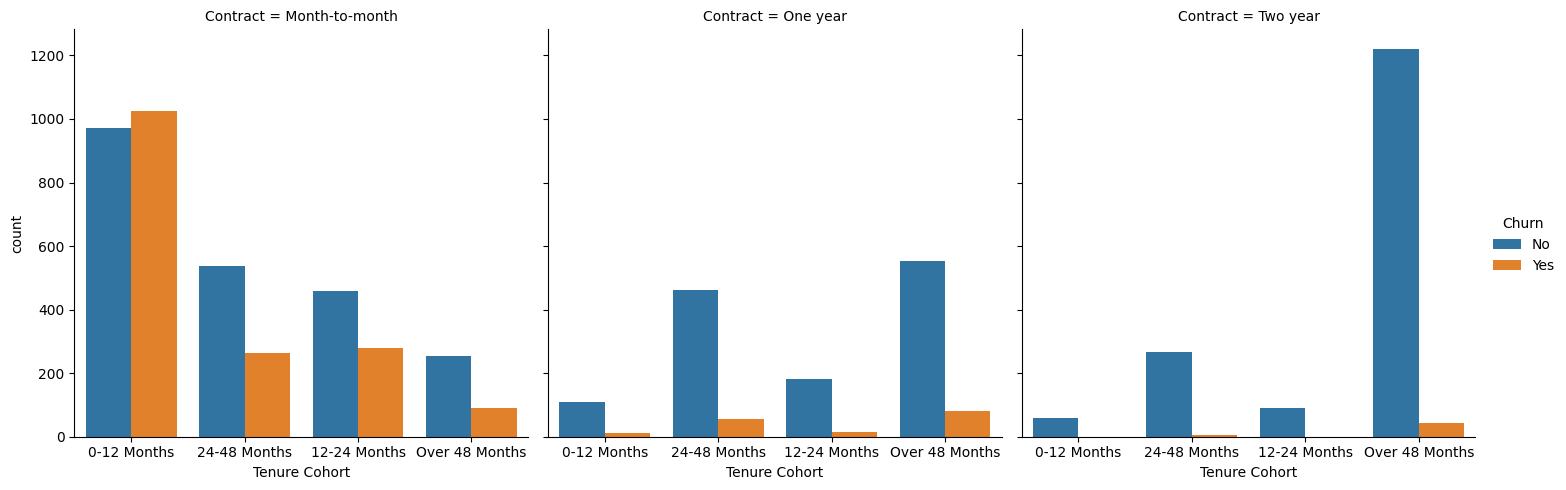

In [27]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count')

10. Some other Bivariate Analysis

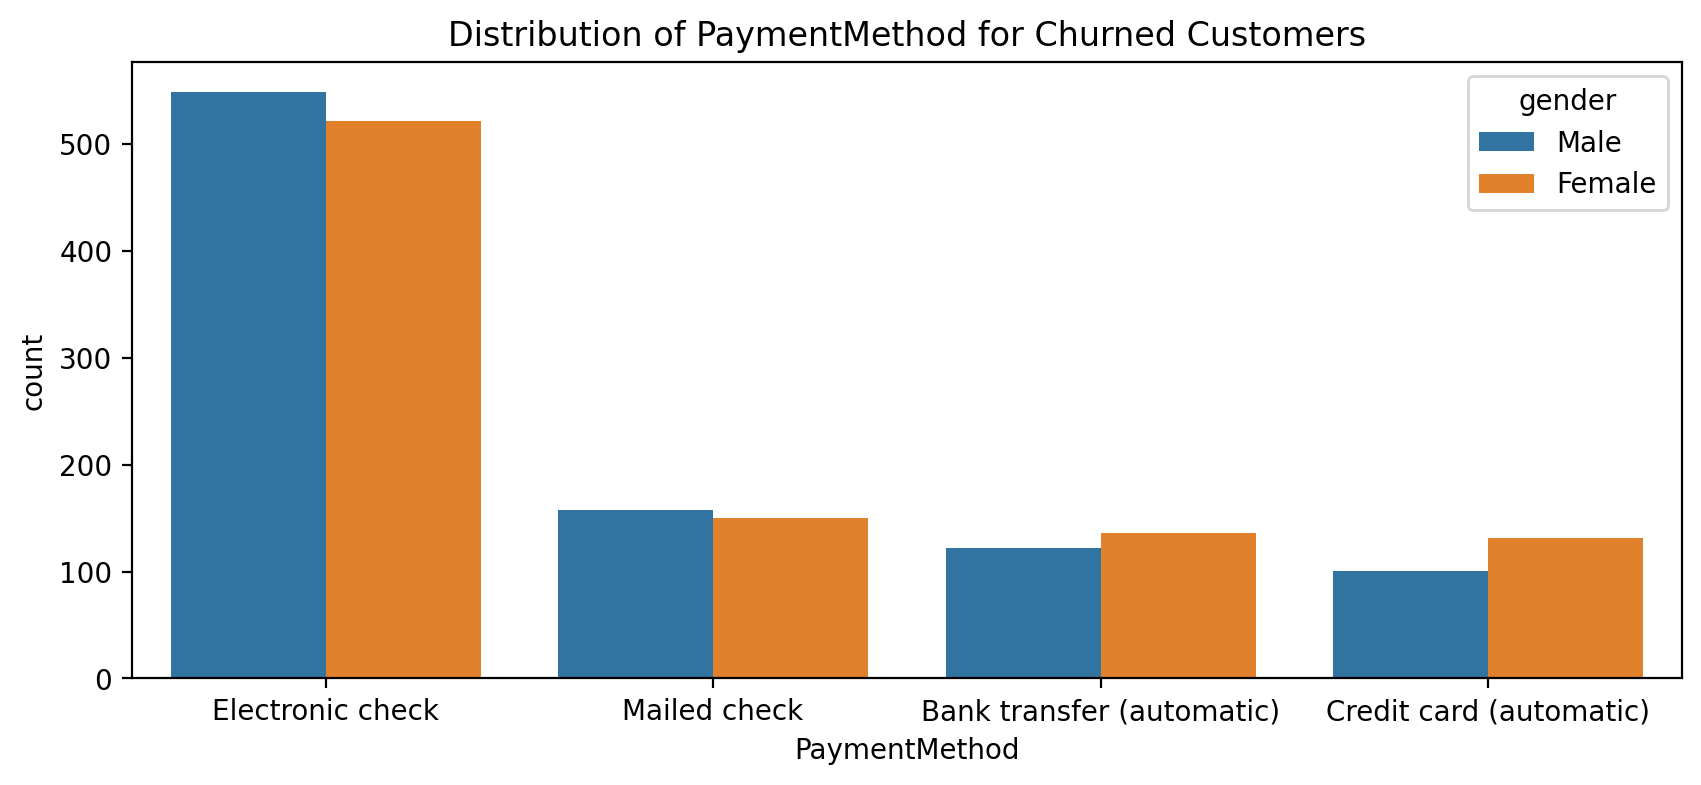

In [28]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(df[df['Churn'] == 'Yes'],x='PaymentMethod',hue='gender',order=df['PaymentMethod'].value_counts().index)
plt.title('Distribution of PaymentMethod for Churned Customers')
plt.show()

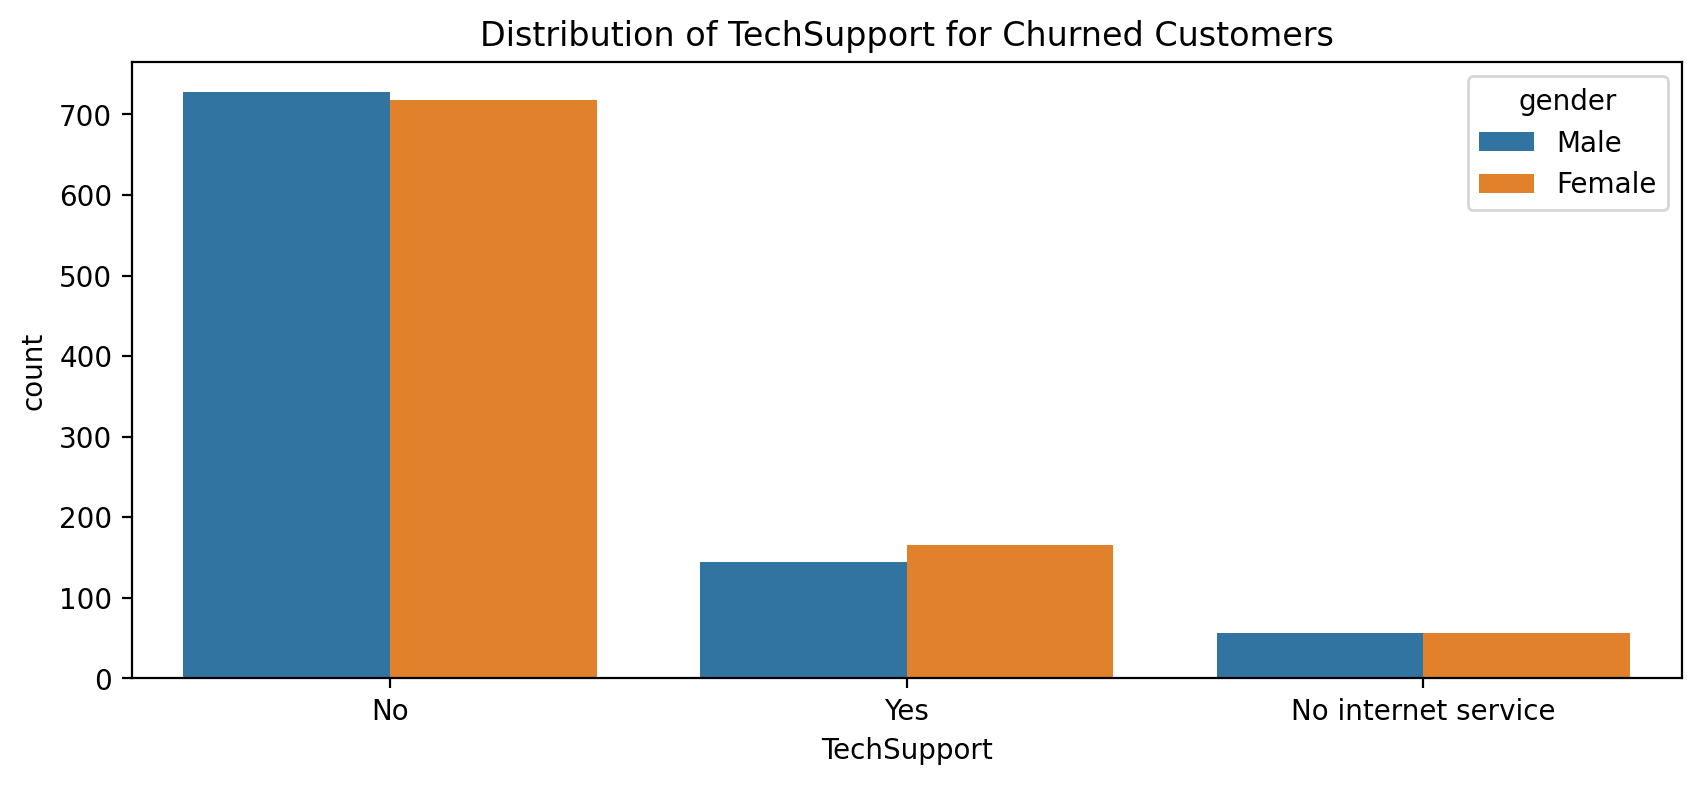

In [29]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(df[df['Churn'] == 'Yes'],x='TechSupport',hue='gender',order=df['TechSupport'].value_counts().index)
plt.title('Distribution of TechSupport for Churned Customers')
plt.show()

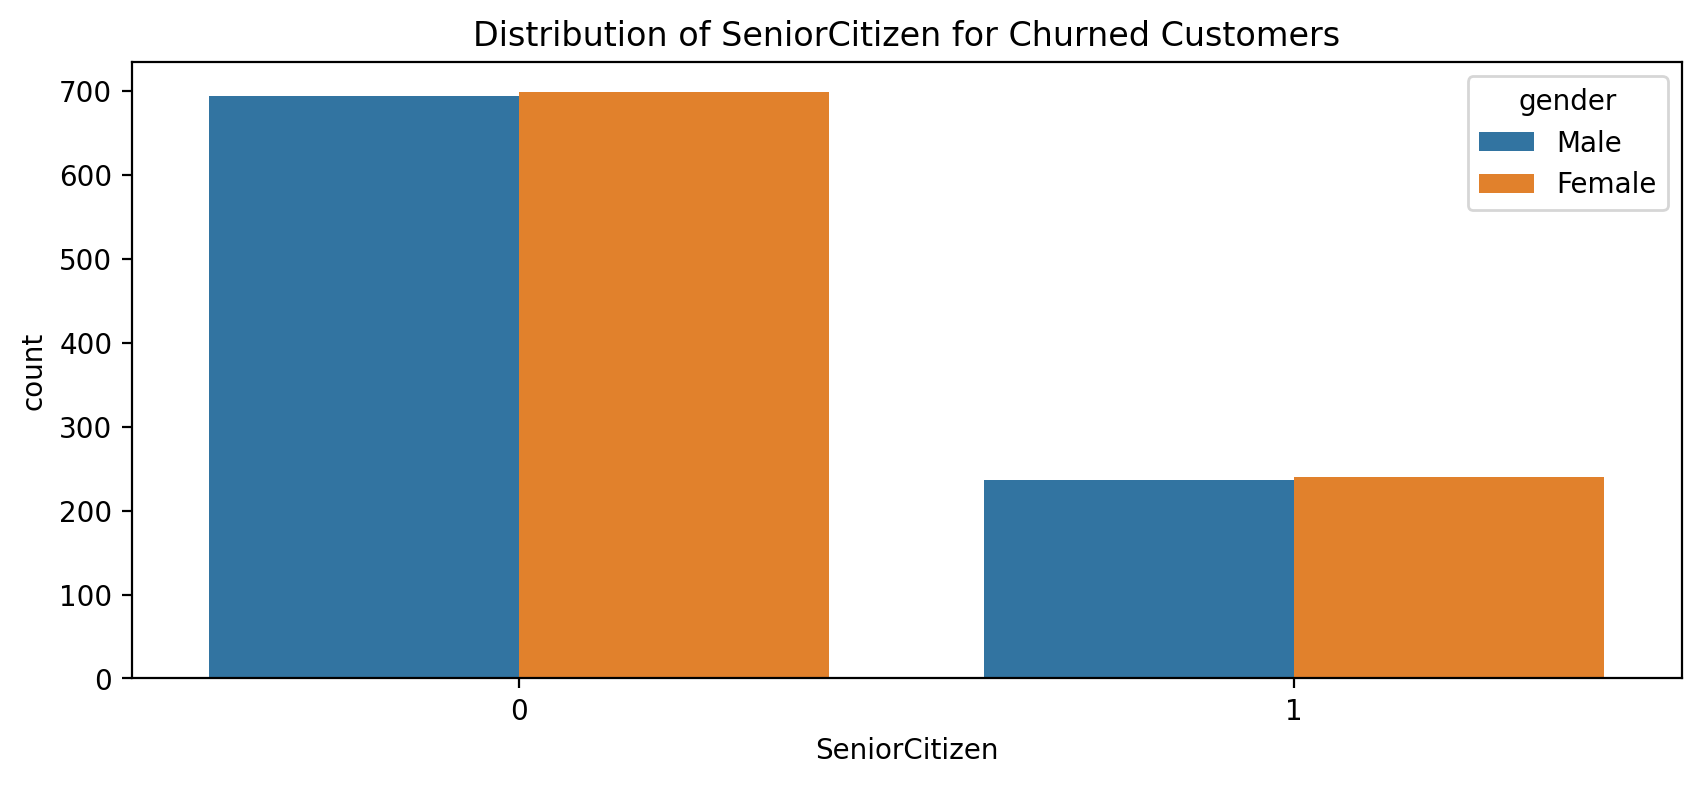

In [30]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(df[df['Churn'] == 'Yes'],x='SeniorCitizen',hue='gender',order=df['SeniorCitizen'].value_counts().index)
plt.title('Distribution of SeniorCitizen for Churned Customers')
plt.show()

**Observation**: 

(i) Customers with Electronic Check Medium are more likely to churn than the customers with other payment methods.

(ii) No Online security, No Tech Support category are high churners.

(iii) Non senior Citizens are high churners.

# Data Pre-Processing

1. **Chi-Squared Test**

Let's check the significance between each feature and our dependent variable (Churn).

In [31]:
# Feature Selection
from scipy.stats import chi2_contingency

# select only categorical columns except the target variable
cat_columns = [col for col in df.columns if df[col].dtype == 'object' and col != 'Churn']
chi2_results = []

for column in cat_columns:
    # create a contingency table of the two variables
    contingency_table = pd.crosstab(df[column], df['Churn'])

    # perform the chi-square test
    stat, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append((column, stat, p))


results_df = pd.DataFrame(chi2_results, columns=['Feature', 'Chi-square stat', 'p-value'])
results_df.sort_values('p-value', inplace=True)
print(results_df)

             Feature  Chi-square stat        p-value
13          Contract      1179.545829  7.326182e-257
16     Tenure Cohort       864.019974  5.638328e-187
7     OnlineSecurity       846.677389  1.400687e-184
10       TechSupport       824.925564  7.407808e-180
6    InternetService       728.695614  5.831199e-159
15     PaymentMethod       645.429900  1.426310e-139
8       OnlineBackup       599.175185  7.776099e-131
9   DeviceProtection       555.880327  1.959389e-121
12   StreamingMovies       374.268432   5.353560e-82
11       StreamingTV       372.456502   1.324641e-81
14  PaperlessBilling       256.874908   8.236203e-58
3         Dependents       186.321639   2.019659e-42
2            Partner       157.503151   3.973798e-36
5      MultipleLines        11.271541   3.567927e-03
4       PhoneService         0.873733   3.499240e-01
1             gender         0.475455   4.904885e-01
0         customerID      7032.000000   4.943933e-01


**Observation:** Dropping gender, PhoneService and MultipleLines variables because there's no significant association between gender and PhoneService variables with Churn (dependent variable). Dropping insigificant variables can improve our accuracy since it's making the model less complex.

2. **Shapiro - Wilk Test (Normal distribution testing)**

In [32]:
from scipy.stats import shapiro

norm_test_df = df[['MonthlyCharges', 'TotalCharges', 'tenure']]

for col in norm_test_df.columns:
    # Test for normality using the Shapiro-Wilk test
    stat, p = shapiro(df[col])
    # Interpret the p-value
    alpha = 0.05
    if p > alpha:
        print(f'{col} is normally distributed (p={p:.6f})')
    else:
        print(f'{col} is not normally distributed (p={p:.6f})')

MonthlyCharges is not normally distributed (p=0.000000)
TotalCharges is not normally distributed (p=0.000000)
tenure is not normally distributed (p=0.000000)


c:\Users\puyus\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Observation**: Since non of our numerical variables are normally distributed we will normalize them

# Predictive Modeling

Here, We will be using ML pipeline which has major benefits. It drastically simplifies ML project by unifying data preprocessing, feature engineering and ML model into a unified framework.

For this purpose of classification, We've tried Multi-Layer Stacking in which various weak learners are ensembled in a parallel manner in such a way that by combining them with Meta learners, we can predict better predictions for the future.

Always remember that higher number of levels or models does NOT guarantee better result. The key to success in stacking (and ensembling in general) is diversity - low correlation between models. Less correlated models give better result.

In [33]:
df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months


In [34]:
X = df.drop(['Churn', 'customerID', 'tenure', 'gender', 'PhoneService', 'MultipleLines'],axis=1)

In [35]:
X.head(4)

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Tenure Cohort
0,0,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0-12 Months
1,0,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,24-48 Months
2,0,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0-12 Months
3,0,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,24-48 Months


In [36]:
X.to_csv('tel_churn.csv', index=False)

In [37]:
df['Churn'] = df['Churn'].map( {'Yes':1 ,'No':0})

y = df['Churn']

In [38]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-12 Months


**Performming PCA to know how much atmost number of feature we should use to get 90% of variance of data**

In [39]:
X_sample = df.drop(['Churn','customerID', 'gender', 'PhoneService', 'MultipleLines', 'tenure'],axis=1)
y_sample = df['Churn']

cat_vars = ['Partner', 'Dependents', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Tenure Cohort']
X_sample[cat_vars] = X_sample[cat_vars].astype(str)

X_sample = pd.get_dummies(X_sample, drop_first=True, columns=cat_vars)

In [40]:
from sklearn.preprocessing import StandardScaler
con_vars = ['MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()
X_sample[con_vars] = scaler.fit_transform(X_sample[con_vars])

X_sample.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure Cohort_12-24 Months,Tenure Cohort_24-48 Months,Tenure Cohort_Over 48 Months
0,0,-1.161694,-0.994194,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,0,-0.260878,-0.173740,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,0,-0.363923,-0.959649,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0,-0.747850,-0.195248,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0.196178,-0.940457,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [41]:
from imblearn.combine import SMOTEENN

sme = SMOTEENN(random_state=42)
X_sample , y_sample = sme.fit_resample(X_sample, y_sample)

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)

X_sample = pca.fit_transform(X_sample)

np.cumsum(pca.explained_variance_ratio_)

array([0.3923392 , 0.57210628, 0.62965654, 0.66904009, 0.70463316,
       0.73642916, 0.76489695, 0.79221816, 0.81724968, 0.84107013,
       0.86315186, 0.88322292, 0.90269336, 0.92078134, 0.93785269,
       0.95246796, 0.96674175, 0.98008949, 0.98848875, 0.9949751 ,
       0.99777743, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

**Observation:** Choosing 11 components of PCA as it returns minimum of 90% of variance from data

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [44]:
X_train.head(3)

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Tenure Cohort
175,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,24.70,780.20,24-48 Months
2935,1,No,No,DSL,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,54.45,2854.55,Over 48 Months
5915,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.65,1218.45,Over 48 Months


**For this project, I will be using SMOTEENN (UpSampling + ENN) from the imbalanced-learn library to resample the dataset**

**-->** SMOTE(Synthetic Minority Oversampling Technique) is a popular technique for oversampling the minority class in an imbalanced dataset. and Edited Nearest Neighbors/ ENN rule is a undersampling method. This rule involves using k=3 nearest neighbors to locate those examples in a dataset that are misclassified and that are then removed. It can be applied to all classes or just those examples in the majority class. 

**-->** ENN is used to remove examples from both classes. Thus, any example that is misclassified by its three nearest neighbors is removed from the training set. ENN is more aggressive at downsampling the majority class, providing more in-depth cleaning. 

Note: Resampling methods are designed to add or remove examples from the training dataset in order to change the class distribution. It helps to balance the class distribution in the dataset and improves the performance of classification models on the minority class.

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.combine import SMOTEENN
from sklearn.decomposition import PCA

trf_1 = ColumnTransformer(
    [('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first'), [1,2,3,4,5,6,7,8,9,10,11,12,15])],
    remainder ='passthrough'
)

resample = SMOTEENN(random_state=101)

trf_2 = ColumnTransformer(
    [('ss', StandardScaler(), [13, 14])],
    remainder ='passthrough'
)

# Feature Extraction

pca = PCA(n_components=13)

1st Level In Stacking

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  

rf = RandomForestClassifier(random_state=101, n_jobs=-1, n_estimators=64, bootstrap=True, max_depth=5, min_samples_leaf=8)
svc = SVC(random_state = 101, class_weight='balanced', probability=True)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('rf', rf), ('svc', svc)],voting='soft')

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_jobs=-1)

In [48]:
# If you want to make predictions using a stacked ensemble model, you need to use a different class that supports prediction, such as StackingClassifier or StackingRegressor. These classes combine multiple estimator objects, including a final meta-estimator, to make predictions on new data.
# We can't use "from vecstack import StackingTransformer"
from sklearn.ensemble import StackingClassifier

estimator_1 = [
    ('voting', voting),
    ('knn', knn)
]

stack_1 = StackingClassifier(estimator_1, n_jobs=-1, final_estimator= LogisticRegression(random_state = 101, n_jobs=-1, solver='saga'))

2nd Level in Stacking

In [49]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(objective="binary:logistic", random_state=101, n_estimators=64)

In [50]:

# If we want to use two layers of stacking, you can create a nested structure using scikit-learn's stacking functionality. This involves creating a second layer of estimators that takes the predictions of the first layer as input.
estimator_2 = [
    ('stacking', stack_1),
    ('xgbc', xgbc)
]

stack_2 = StackingClassifier(estimator_2, n_jobs=-1, final_estimator= LogisticRegression(random_state = 101, n_jobs=-1, solver='saga'))

Note: The problem is, if you're sampling your data, the intermediate steps obviously need to sample the data as well, which is not supported by sklearn's Pipeline but is supported by imblearn's Pipeline.

In [51]:
from imblearn.pipeline import Pipeline

pipe = Pipeline([
     ('step1', trf_1),
     ('step2', resample),
     ('step3', trf_2),
     ('step4', pca),
     ('step5', stack_2)
     ]
)

**Hyper-Parameter Tuning of Models**

**-->** Note, We are tuning a few of Hyper-Parameters otherwise this is resulting 'Stack Overflow error'. So, some of paramters I have commented.

**-->** We are using RandomizedSearchCV instead of GridSearchCV otherwise it will take a consume a lot of time during training ie. GridSearchCV is computationally expensive . Also, it'll gives integer overflow error.

In [52]:
# Parameters of pipelines can be set using '__' separated parameter names. sklearn uses double underscore as separator
# We can make even list in param_grid for trying different combinations of models in stacking
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# We're tuning only a few of parameters otherwise training time will increase a lot. Also, there would be memory issue
param_grid = {
    # "step5__stacking__voting__rf__criterion": ['gini', 'entropy'],
    "step5__stacking__voting__rf__max_features": ['sqrt', 'log2'],
    "step5__stacking__voting__rf__max_samples": [0.85, 1],
    "step5__stacking__voting__rf__min_samples_split": [10, 20, 30],
    # "step5__stacking__voting__svc__C": [0.1,0.7,1,5],
    "step5__stacking__voting__svc__kernel": ['rbf', 'poly'],
    # "step5__stacking__voting__svc__gamma": ['scale', 'auto'],
    "step5__stacking__voting__svc__degree": [2, 3],
    "step5__stacking__knn__n_neighbors": [5, 11],
    # "step5__stacking__knn__weights": ['distance', 'uniform'],
    # "step5__stacking__knn__p": [1, 2],
    "step5__xgbc__gamma": [0, 0.25, 0.75],
    "step5__xgbc__reg_lambda": [0.4, 0.9, 10],
    # "step5__xgbc__subsample": [0.9, 1],
    "step5__xgbc__learning_rate": np.linspace(0.5, 0.9, 5)
}

# In the case of classification tasks, I recommend using the RepeatedStratifiedKFold class, and for regression tasks, I recommend using the RepeatedKFold with an appropriate number of folds and repeats, such as 10 folds and three repeats.
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats= 2, random_state=101)
search = RandomizedSearchCV(pipe, param_grid, n_jobs=-1, n_iter=2, scoring= 'accuracy', cv=cv)
search.fit(X_train, y_train)

c:\Users\puyus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=101),
                   estimator=Pipeline(steps=[('step1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               [1,
                                                                                2,
                                                                                3,
                                                                                4,
                                                                                5,
                                                                                6,
                                                                                7,
                                                                                8,
                                                                                9,
                                                                                10,
                                                                                11,
                                                                                12,
                                                                                15])])),
                                             ('step2',
                                              SMOTEENN(random_state=101)),
                                             ('step3',
                                              ColumnTransformer(...
                                        'step5__stacking__voting__rf__max_samples': [0.85,
                                                                                     1],
                                        'step5__stacking__voting__rf__min_samples_split': [10,
                                                                                           20,
                                                                                           30],
                                        'step5__stacking__voting__svc__degree': [2,
                                                                                 3],
                                        'step5__stacking__voting__svc__kernel': ['rbf',
                                                                                 'poly'],
                                        'step5__xgbc__gamma': [0, 0.25, 0.75],
                                        'step5__xgbc__learning_rate': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'step5__xgbc__reg_lambda': [0.4, 0.9,
                                                                    10]},
                   scoring='accuracy')

In [53]:
print("Parameters of Best Estimator in Model: ")
print(search.best_params_)
print("Best score in grid search:")
print(search.best_score_)

Parameters of Best Estimator in Model: 
{'step5__xgbc__reg_lambda': 10, 'step5__xgbc__learning_rate': 0.5, 'step5__xgbc__gamma': 0, 'step5__stacking__voting__svc__kernel': 'rbf', 'step5__stacking__voting__svc__degree': 2, 'step5__stacking__voting__rf__min_samples_split': 30, 'step5__stacking__voting__rf__max_samples': 1, 'step5__stacking__voting__rf__max_features': 'sqrt', 'step5__stacking__knn__n_neighbors': 5}
Best score in grid search:
0.7307177341486966


In [54]:
print(search.best_estimator_.get_params())

{'memory': None, 'steps': [('step1', ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15])])), ('step2', SMOTEENN(random_state=101)), ('step3', ColumnTransformer(remainder='passthrough',
                  transformers=[('ss', StandardScaler(), [13, 14])])), ('step4', PCA(n_components=13)), ('step5', StackingClassifier(estimators=[('stacking',
                                StackingClassifier(estimators=[('voting',
                                                                VotingClassifier(estimators=[('rf',
                                                                                              RandomForestClassifier(max_depth=5,
                                                 

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, precision_recall_curve, roc_curve, auc, f1_score
y_pred = search.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7355450236966825


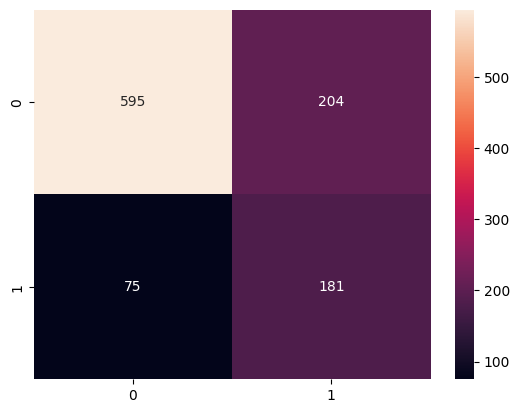

In [56]:
cm = confusion_matrix(y_test, y_pred)  
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
plt.show()

In [57]:
print(classification_report(y_test, y_pred))

print("F1 Score: ", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       799
           1       0.47      0.71      0.56       256

    accuracy                           0.74      1055
   macro avg       0.68      0.73      0.69      1055
weighted avg       0.79      0.74      0.75      1055

F1 Score:  0.5647425897035881


Let's Check Evaluation Metrics for classification on Different Thresholds

In [58]:
threshold_list = [0.3,0.4,0.5,0.6,0.7]

def custom_predict(X, threshold):
    probs = search.predict_proba(X) 
    return (probs[:, 1] > threshold).astype(int)
    
    
for i in threshold_list:
    y_pred = custom_predict(X=X_test, threshold=i) 
    print(f"For threshold {i}: ")
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

For threshold 0.3: 
Accuracy:  0.7033175355450237
[[555 244]
 [ 69 187]]
For threshold 0.4: 
Accuracy:  0.7165876777251184
[[573 226]
 [ 73 183]]
For threshold 0.5: 
Accuracy:  0.7355450236966825
[[595 204]
 [ 75 181]]
For threshold 0.6: 
Accuracy:  0.7516587677725118
[[616 183]
 [ 79 177]]
For threshold 0.7: 
Accuracy:  0.7611374407582938
[[631 168]
 [ 84 172]]


**Observation:** 

**Attributes of Stacking**

In [59]:
# To get a description of 1st Level in Stacking
search.best_estimator_['step5']

StackingClassifier(estimators=[('stacking',
                                StackingClassifier(estimators=[('voting',
                                                                VotingClassifier(estimators=[('rf',
                                                                                              RandomForestClassifier(max_depth=5,
                                                                                                                     max_samples=1,
                                                                                                                     min_samples_leaf=8,
                                                                                                                     min_samples_split=30,
                                                                                                                     n_estimators=64,
                                                                                                                     n_jobs=-1,
                                                                                                                     random_state=101)),
                                                                                             ('svc',
                                                                                              SVC(class_weight='balanced',
                                                                                                  degree=2,
                                                                                                  probability=True,
                                                                                                  random_state=101))],
                                                                                 voting='soft')),...
                                              learning_rate=0.5, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=64, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=101, ...))],
                   final_estimator=LogisticRegression(n_jobs=-1,
                                                      random_state=101,
                                                      solver='saga'),
                   n_jobs=-1)

In [60]:
# stacking description
search.best_estimator_['step5'].estimators_

[StackingClassifier(estimators=[('voting',
                                 VotingClassifier(estimators=[('rf',
                                                               RandomForestClassifier(max_depth=5,
                                                                                      max_samples=1,
                                                                                      min_samples_leaf=8,
                                                                                      min_samples_split=30,
                                                                                      n_estimators=64,
                                                                                      n_jobs=-1,
                                                                                      random_state=101)),
                                                              ('svc',
                                                               SVC(class_weight='balanced',
      

In [61]:
# Best estimator description of Voting Classifier
search.best_estimator_['step5'].estimators_[0].estimators_[0]

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=5, max_samples=1,
                                                     min_samples_leaf=8,
                                                     min_samples_split=30,
                                                     n_estimators=64, n_jobs=-1,
                                                     random_state=101)),
                             ('svc',
                              SVC(class_weight='balanced', degree=2,
                                  probability=True, random_state=101))],
                 voting='soft')

In [62]:
search.cv_results_

{'mean_fit_time': array([102.76201043,  81.45527263]),
 'std_fit_time': array([5.12122972, 8.98685205]),
 'mean_score_time': array([1.14709833, 0.42988136]),
 'std_score_time': array([0.40006549, 0.218112  ]),
 'param_step5__xgbc__reg_lambda': masked_array(data=[10, 0.9],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_step5__xgbc__learning_rate': masked_array(data=[0.5, 0.9],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_step5__xgbc__gamma': masked_array(data=[0, 0],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_step5__stacking__voting__svc__kernel': masked_array(data=['rbf', 'rbf'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_step5__stacking__voting__svc__degree': masked_array(data=[2, 2],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_step5__s

In [63]:
X_train.head(5)

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Tenure Cohort
175,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,24.70,780.20,24-48 Months
2935,1,No,No,DSL,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,54.45,2854.55,Over 48 Months
5915,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.65,1218.45,Over 48 Months
3703,0,No,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,50.75,50.75,0-12 Months
1054,0,No,No,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,84.70,832.05,0-12 Months


In [64]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats= 2, random_state=101)
search = RandomizedSearchCV(pipe, param_grid, n_jobs=-1, n_iter=2, scoring= 'accuracy', cv=cv)
search.fit(X, y)

c:\Users\puyus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=101),
                   estimator=Pipeline(steps=[('step1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               [1,
                                                                                2,
                                                                                3,
                                                                                4,
                                                                                5,
                                                                                6,
                                                                                7,
                                                                                8,
                                                                                9,
                                                                                10,
                                                                                11,
                                                                                12,
                                                                                15])])),
                                             ('step2',
                                              SMOTEENN(random_state=101)),
                                             ('step3',
                                              ColumnTransformer(...
                                        'step5__stacking__voting__rf__max_samples': [0.85,
                                                                                     1],
                                        'step5__stacking__voting__rf__min_samples_split': [10,
                                                                                           20,
                                                                                           30],
                                        'step5__stacking__voting__svc__degree': [2,
                                                                                 3],
                                        'step5__stacking__voting__svc__kernel': ['rbf',
                                                                                 'poly'],
                                        'step5__xgbc__gamma': [0, 0.25, 0.75],
                                        'step5__xgbc__learning_rate': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'step5__xgbc__reg_lambda': [0.4, 0.9,
                                                                    10]},
                   scoring='accuracy')

In [65]:
import joblib
import numpy as np

joblib.dump(search, "Customer_Churn_Model.pkl")
joblib.dump(list(X.columns), "Customer_Churn_Columns.pkl")

['Customer_Churn_Columns.pkl']

# **Loading Model**

In [66]:
columns = joblib.load('Customer_Churn_Columns.pkl')
columns

['SeniorCitizen',
 'Partner',
 'Dependents',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Tenure Cohort']

In [67]:
model = joblib.load('Customer_Churn_Model.pkl')

model.predict(np.array([[0, 'No', 'Yes', 'DSL', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Month-to-month', 'Yes', 'Mailed check', 64.7, 1093.1, '12-24 Months']], dtype=object))

c:\Users\puyus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

We are getting true prediction for this data point (Look at 264th index)

In [68]:
df.iloc[29]

customerID              8773-HHUOZ
gender                      Female
SeniorCitizen                    0
Partner                         No
Dependents                     Yes
tenure                          17
PhoneService                   Yes
MultipleLines                   No
InternetService                DSL
OnlineSecurity                  No
OnlineBackup                    No
DeviceProtection                No
TechSupport                     No
StreamingTV                    Yes
StreamingMovies                Yes
Contract            Month-to-month
PaperlessBilling               Yes
PaymentMethod         Mailed check
MonthlyCharges                64.7
TotalCharges                1093.1
Churn                            1
Tenure Cohort         12-24 Months
Name: 29, dtype: object

# **Thank You**